In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()  # Enable progress_apply with progress bar in Jupyter environments
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.matutils import Sparse2Corpus
from gensim import models
from scipy.sparse import csr_matrix
import missingno as msno
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [19]:
"""
df_test = pd.read_excel('total_scraped_final.xlsx')
df_test.head(20)
"""

"\ndf_test = pd.read_excel('total_scraped_final.xlsx')\ndf_test.head(20)\n"

In [20]:
#df_test.shape

In [21]:
# Relative path to the Excel file from the current notebook's location
file_path = '../combined_updated.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first 20 rows
df.head(20)


Date                             Source  \
0  2022-09-30 22:08:34     Il Messaggero - Borsa Italiana   
1  2022-09-30 21:44:15  Puls Biznesu - Z ostatniej chwili   
2  2022-09-30 21:30:13            Handelsblatt - Finanzen   
3  2022-09-30 21:07:32                     Trend - Správy   
4  2022-09-30 20:56:08                  Bloomberg - GNews   
5  2022-09-30 19:47:02                      Trend. - Home   
6  2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
7  2022-09-30 19:11:05                            Tgcom24   
8  2022-09-30 19:11:05                            Tgcom24   
9  2022-09-30 18:53:08                       Der Aktionär   
10 2022-09-30 18:46:15                            Tgcom24   
11 2022-09-30 18:42:47                 Il Foglio - Page 3   
12 2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
13 2022-09-30 18:32:37                  Finance.si - Live   
14 2022-09-30 18:25:42                 Il Foglio - Page 3   
15 2022-09-30 18:25:13            Handelsblatt - Finanzen   
16 2022-09-30 18:23:18                            Tgcom24   
17 2022-09-30 18:23:02  Affaritaliani Libero - Notiziario   
18 2022-09-30 18:19:40                 Il Foglio - Page 2   
19 2022-09-30 18:12:29                            Tgcom24   

                                             Headline  \
0   Visco: «Troppi rialzi dei tassi, si va in rece...   
1      Knot: kolejne podwyżki stóp  EBC  są konieczne   
2   EZB-Ratsmitglied Visco: Rezessionsrisiko bei g...   
3   ECB  by mala byť pri zvyšovaní sadzieb opatrná...   
4   ECB 's Schnabel Says Weaker Demand May Not Eas...   
5      EZB-Direktorin Schnabel für "robustes" Handeln   
6   Visco: "Lo shock energetico è un onere ineludi...   
7   Bce: Schnabel, necessari ulteriori rialzi dei ...   
8   Bce: Schnabel non vede rischio spirale salari-...   
9   EZB ‑Geldpolitik: Ratsmitglied Visco warnt vor...   
10    Energia: Visco, shock ineludibile per area euro   
11  **Conti pubblici: Visco, rientro debito ben in...   
12  **Conti pubblici: Visco, rientro debito ben in...   
13  Evrska inflacija na novem rekordu. Bo  ECB  ok...   
14  Bce: Visco, 'su rialzo tassi opportuno muovers...   
15  EZB-Direktorin Schnabel fordert wegen Rekordin...   
16  Inflazione: Visco, no segnali avvio pericolose...   
17  Bce: Visco, 'su rialzo tassi opportuno muovers...   
18  **Bce: Visco, 'rialzo tassi troppo rapido e fo...   
19  Bce: Visco, non ha ritardato riequilibrio poli...   

                                  Translated.headline  \
0   Banca d'Italia's Visco: "Too many rate hikes w...   
1        Knot: further  ECB  rate hikes are necessary   
2   ECB 's Visco: Recession risk in the event of m...   
3   ECB  should be cautious about rate hikes, says...   
4   ECB 's Schnabel says weaker demand may not eas...   
5   ECB  Executive Board Member Schnabel is for "r...   
6   Visco: "Energy shock is an unavoidable burden....   
7        ECB : Schnabel, further rate hikes necessary   
8   ECB : Schnabel sees no risk of spiraling wages...   
9   ECB  monetary policy: Council member Visco war...   
10     Energy: Visco, inescapable shock for euro area   
11  Public accounts: Visco, debt repayment well ad...   
12  Public accounts: Visco, debt repayment well ad...   
13  Euro area inflation on a new record. Will the ...   
14  ECB , Visco: “it is appropriate to move gradua...   
15  ECB  Executive Board Member Schnabel calls for...   
16  Inflation: Visco, no signs start dangerous pri...   
17  ECB : Visco, when rising rates it is appropria...   
18  ECB , Visco: too rapid and strong rate hike ca...   
19  ECB : Visco, did not delay monetary policy reb...   

                                       Manual.summary  \
0   At a conference in Florence, Banca d'Italia Go...   
1                                                 NaN   
2   Banca d'Italia Governor  Ignazio Visco  on Fri...   
3                                                 NaN   
4   ECB  Executive Board Member  Isabel Schnabel  ...  

# EDA

In [22]:
df.shape

(35076, 16)

In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35076 entries, 0 to 35075
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  35076 non-null  datetime64[ns]
 1   Source                35076 non-null  object        
 2   Headline              34952 non-null  object        
 3   Translated.headline   35034 non-null  object        
 4   Manual.summary        31384 non-null  object        
 5   Original.article.url  35076 non-null  object        
 6   Translated.text       25996 non-null  object        
 7   Media.type            35076 non-null  object        
 8   Speaker               34768 non-null  object        
 9   Reach                 35076 non-null  int64         
 10  Language              35071 non-null  object        
 11  Country.Code          35072 non-null  object        
 12  Sitename              35076 non-null  object        
 13  Tags            

Date         Reach  Site_Readership  \
count                          35076  3.507600e+04     2.164200e+04   
mean   2023-05-03 19:27:22.118913280  8.763945e+05     1.100025e+06   
min              2022-07-02 02:25:07  0.000000e+00     0.000000e+00   
25%    2022-12-24 08:06:14.249999872  5.701400e+04     2.302088e+05   
50%              2023-05-07 00:00:00  2.409890e+05     6.419660e+05   
75%    2023-09-14 07:23:07.750000128  1.020279e+06     1.230200e+06   
max              2024-03-10 04:34:13  4.534900e+07     9.068038e+06   
std                              NaN  1.847307e+06     1.486908e+06   

       Article_Readership  
count        2.285200e+04  
mean         2.077230e+05  
min          0.000000e+00  
25%          0.000000e+00  
50%          9.191000e+03  
75%          1.050118e+05  
max          4.507584e+07  
std          1.151107e+06

<Axes: >

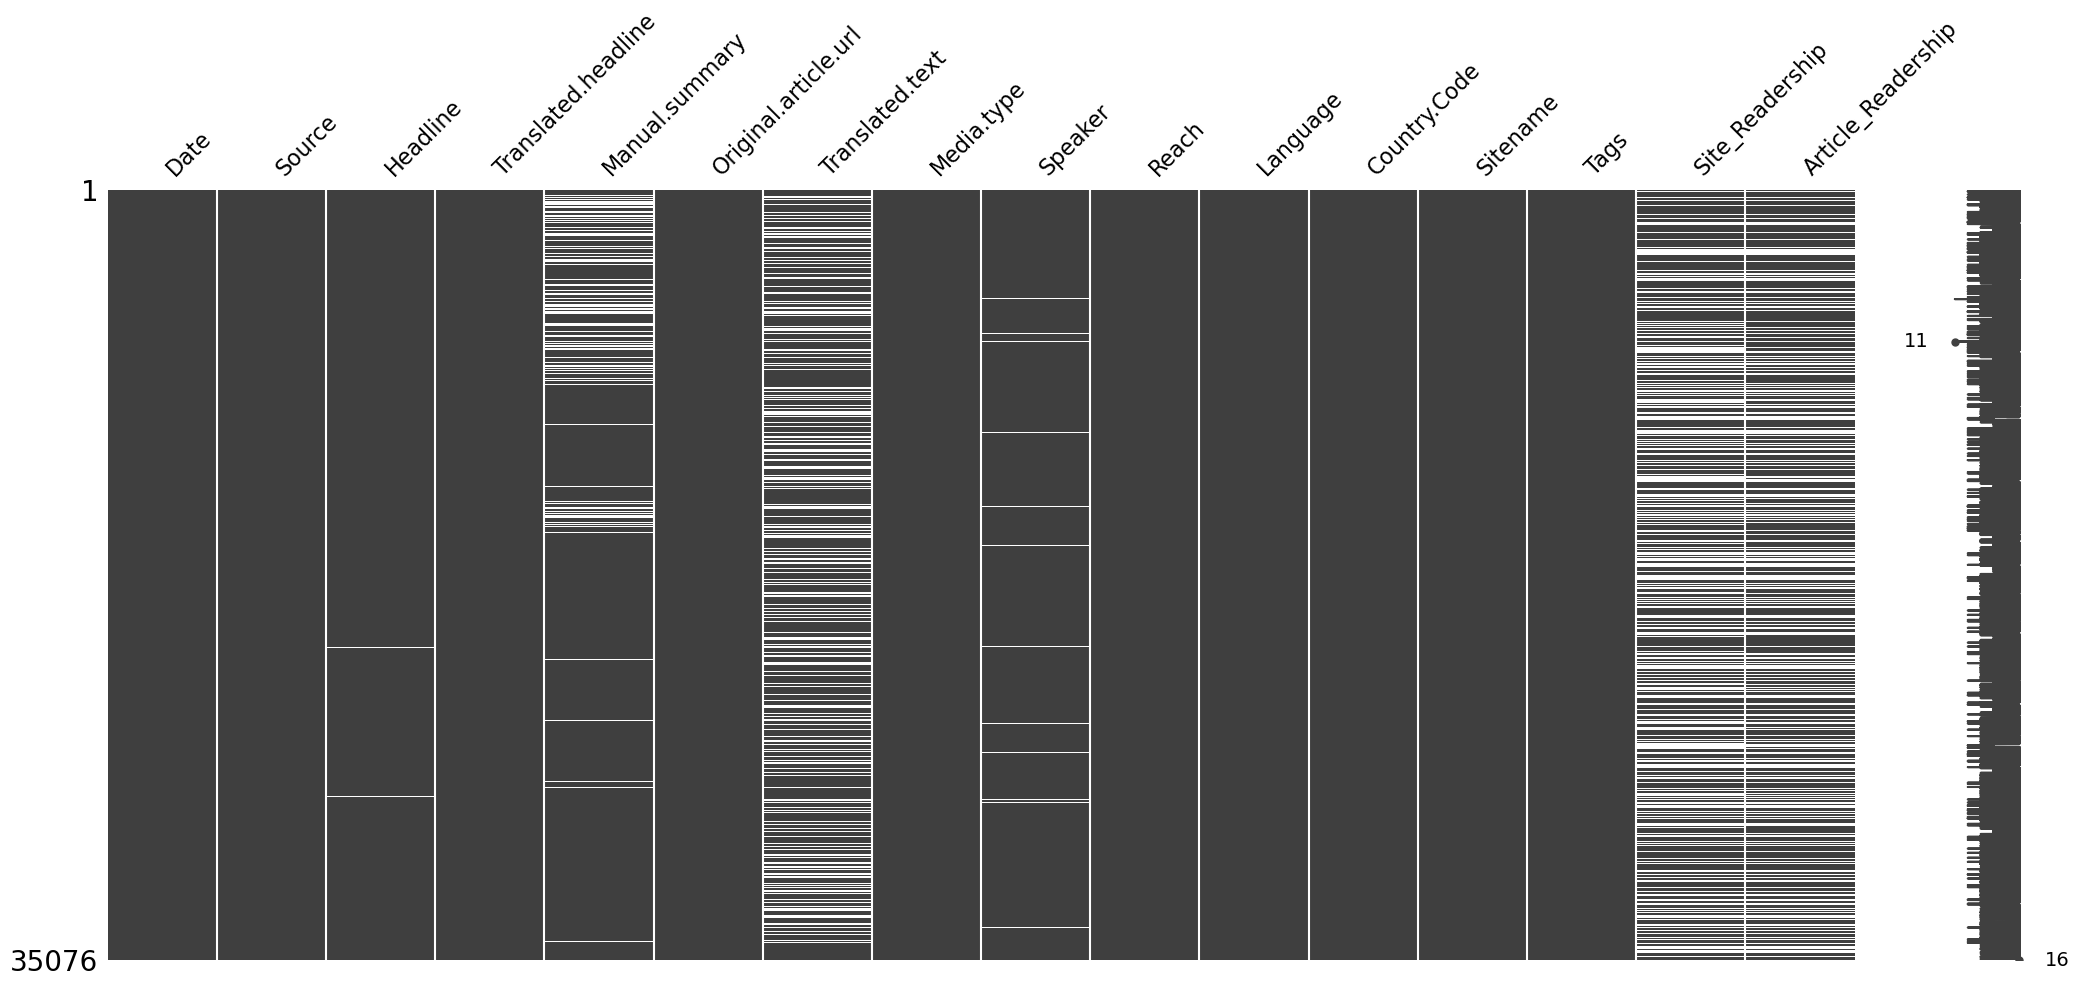

In [24]:
msno.matrix(df)

In [25]:
# Identify the top sources by the number of articles
top_sources_by_articles = df['Source'].value_counts().head()
print("Top Sources by Number of Articles:")
print(top_sources_by_articles)
print("\n")  # Adds a newline for better readability

# Identify the top sources by the total article readership
top_sources_by_readership = df.groupby('Source')['Article_Readership'].sum().sort_values(ascending=False).head()
print("Top Sources by Total Article Readership:")
print(top_sources_by_readership)


Top Sources by Number of Articles:
Source
Bloomberg - Asia           721
Handelsblatt - Finanzen    399
LaVanguardia               395
Finanzen.ch - Home         301
Expansión                  301
Name: count, dtype: int64


Top Sources by Total Article Readership:
Source
Cnbc - Home                 361997236.0
Le Monde                    285983760.0
Bloomberg - Asia            226692008.0
Le Figaro                   191980411.0
Der Spiegel - Wirtschaft    166224946.0
Name: Article_Readership, dtype: float64


In [26]:
# Count the number of non-null entries in 'Original.article.url'
non_null_count = df['Original.article.url'].notnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(df)

# Calculate the percentage of rows with 'Original.article.url' populated
percentage_populated = (non_null_count / total_rows) * 100

print(f"Percentage of rows with 'Original.article.url' populated: {percentage_populated:.2f}%")

Percentage of rows with 'Original.article.url' populated: 100.00%


In [27]:
# Count the non-null entries in the 'Manual.summary' column
summary_count = df['Manual.summary'].notnull().sum()

# Calculate the total number of articles (rows in the DataFrame)
total_articles = len(df)

# Calculate the percentage of articles with a populated 'Manual.summary'
percentage_summary_populated = (summary_count / total_articles) * 100

# Print the results
print(f"Number of rows with a populated 'Manual.summary': {summary_count}")
print(f"Percentage of articles with a populated 'Manual.summary': {percentage_summary_populated:.2f}%")


Number of rows with a populated 'Manual.summary': 31384
Percentage of articles with a populated 'Manual.summary': 89.47%


In [28]:
# Count the non-null entries in the 'Translated.text' column
summary_count = df['Translated.text'].notnull().sum()

# Calculate the total number of articles (rows in the DataFrame)
total_articles = len(df)

# Calculate the percentage of articles with a populated 'Manual.summary'
percentage_translated_populated = (summary_count / total_articles) * 100

# Print the results
print(f"Number of rows with a populated 'Translated.text': {summary_count}")
print(f"Percentage of articles with a populated 'Translated.text': {percentage_translated_populated:.2f}%")


Number of rows with a populated 'Translated.text': 25996
Percentage of articles with a populated 'Translated.text': 74.11%


In [29]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
null_rows = df[(df['Manual.summary'].isnull() | df['Manual.summary'].eq('') | df['Manual.summary'].eq('-')) & 
               (df['Translated.text'].isnull() | df['Translated.text'].eq(''))]

# Count the number of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
count_both_missing = null_rows.shape[0]

# Calculate the total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate the percentage of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
percentage_both_missing = (count_both_missing / total_rows) * 100

# Print the number of rows and the percentage of total rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
print(f"Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {count_both_missing}")
print(f"Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {percentage_both_missing:.2f}%")

# Print the selected rows
print("\nRows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':")
print(null_rows)


Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 1034
Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 2.95%

Rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':
                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
40    2022-09-30 09:22:50         Børsen - Pro International   
...                   ...                                ...   
29728 2023-12-06 10:55:34                  Bloomberg - News1   
29739 2023-12-06 08:20:16                   Bloomberg - Asia   
32754 2023-10-26 14:58:48                          HN Online   
32972 2023-10-25 10:40:21                   Bloomberg 

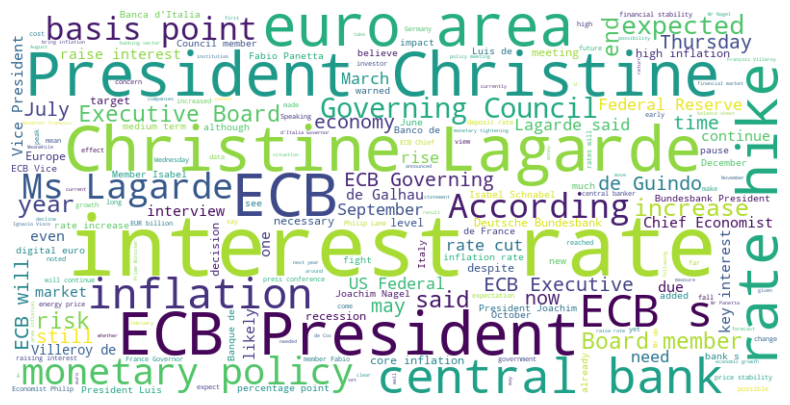

In [30]:
from wordcloud import WordCloud
# Drop NaN values from the 'Manual.summary' column
df = df.dropna(subset=['Manual.summary'])

# Combine all the text from 'Manual.summary' into a single string
text = ' '.join(df['Manual.summary'].astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [31]:
import plotly.io as pio
pio.renderers.default = 'notebook'


In [32]:
# Prepare the data for plotting
data_to_plot = {
    "Column": ["Manual.summary", "Translated.text", "Both Missing"],
    "Percentage Populated": [percentage_summary_populated, percentage_translated_populated, percentage_both_missing]
}

# Convert the dictionary to a DataFrame
plot_data = pd.DataFrame(data_to_plot)

# Plot the percentages using Plotly
fig = px.bar(plot_data, x='Column', y='Percentage Populated',
             text='Percentage Populated',
             title="Percentage of Populated Articles",
             labels={'Percentage Populated': 'Percentage'},
             height=500,  # Keep height the same
             width=900,  # Set the width of the plot
             color='Column',  # Assign colors based on column names
             color_discrete_sequence=px.colors.qualitative.Vivid)  # Using a vivid qualitative color palette

# Update text on the bars to display the percentage values
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Customize the layout to enhance visual appeal
fig.update_layout(
    yaxis=dict(
        title='Percentage',
        range=[0, 110],  # Extending the Y-axis range slightly above 100
        showgrid=True,  # Keep the Y-axis gridlines for reference
        gridcolor='lightgrey',  # Lighter gridline color for subtlety
        gridwidth=1  # Slightly thicker gridlines for better visibility
    ),
    xaxis=dict(
        title='Column',
        showgrid=False,  # Maintain no gridlines on X-axis for cleaner look
    ),
    plot_bgcolor='white',
    title_x=0.5,  # Center the plot title
    title_font=dict(size=20, color='navy', family='Arial, sans-serif'),  # Styling the title
)

# Improve the font styling for the axes
fig.update_xaxes(tickangle=0, tickfont=dict(family='Arial, sans-serif', color='darkgrey', size=12))
fig.update_yaxes(tickfont=dict(family='Arial, sans-serif', color='darkgrey', size=12))

# Show the plot
fig.show()


In [33]:
import plotly.express as px
import pandas as pd

# Example data processing (assuming df is your DataFrame and already loaded)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df = df.dropna(subset=['Date'])
df.set_index('Date', inplace=True)

# Plot daily count of articles using Plotly
daily_articles = df.resample('D')['Headline'].count().reset_index()
fig1 = px.line(daily_articles, x='Date', y='Headline', 
               title='Daily Count of Articles', 
               labels={'Headline': 'Number of Articles', 'Date': 'Date'})
fig1.update_xaxes(nticks=20, tickangle=45)
fig1.update_layout(xaxis_title='Date', 
                   yaxis_title='Number of Articles',
                   plot_bgcolor='white',
                   title_x=0.5)
fig1.show()

# Plot monthly sum of article readership using Plotly
monthly_readership = df.resample('M')['Article_Readership'].sum().reset_index()
fig2 = px.line(monthly_readership, x='Date', y='Article_Readership', markers=True,
               title='Monthly Sum of Article Readership',
               labels={'Article_Readership': 'Total Readership', 'Date': 'Date'})
fig2.update_xaxes(nticks=20, tickangle=45)
fig2.update_layout(xaxis_title='Date', 
                   yaxis_title='Total Readership',
                   plot_bgcolor='white',
                   title_x=0.5)
fig2.show()


In [34]:
# Count the occurrences for each language
language_counts = df['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Count the occurrences for each country code
country_code_counts = df['Country.Code'].value_counts().reset_index()
country_code_counts.columns = ['Country Code', 'Count']

# Create a figure with one row and two columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Article Counts by Language', 'Article Counts by Country Code'))

# Plotting the 'Language' bar plot with Plotly in the first column
fig.add_trace(
    go.Bar(x=language_counts['Language'], y=language_counts['Count'], 
           marker=dict(color=px.colors.sequential.Blues[-2])),
    row=1, col=1
)

# Plotting the 'Country Code' bar plot with Plotly in the second column
fig.add_trace(
    go.Bar(x=country_code_counts['Country Code'], y=country_code_counts['Count'], 
           marker=dict(color=px.colors.sequential.Reds[-2])),
    row=1, col=2
)

# Update xaxis properties for both plots for better readability
fig.update_xaxes(tickangle=45, row=1, col=1)
fig.update_xaxes(tickangle=45, row=1, col=2)

# Update layout to adjust spacing and add some styling
fig.update_layout(
    height=500,  # Adjusted for better proportion in side-by-side layout
    width=1500,  # Adjust width to accommodate side-by-side layout
    showlegend=False,
    title_text="Article Counts by Language and Country Code",
    title_x=0.5  # Centering the title
)

fig.show()


In [35]:
# Analysis of Media Type and Language Relationship
# We will create a crosstab to see the frequency of media types across different languages
media_language_relationship = pd.crosstab(df['Media.type'], df['Language'])


print("\nMedia Type and Language Relationship:\n", media_language_relationship)


Media Type and Language Relationship:
 Language     bg  ca  cs   da    de    el    en    es  et   fi  ...    it   lt  \
Media.type                                                     ...              
PRINT         2   0   2  110  1857  1111   477  2112  42  223  ...  2290   17   
RADIO         0   0   0    0   199     7     0    90   5    0  ...    21   31   
SUMMARY       0   0   0   14     0     0    20     0   0    2  ...     0    0   
TV            0   0   0    0   116    10   309    87   6    2  ...   105   14   
WEB         233   1   5  199  3219  1296  2926  3288  74  240  ...  3801  215   

Language    lv   nl   pl    pt   ro   sk   sl   sv  
Media.type                                          
PRINT       10  240   16   405   33   53   85   67  
RADIO       21    0    0    19    0    1   15    0  
SUMMARY      0    0    0     0    0    0    0    5  
TV          26    4    0    96    0    0    3    0  
WEB         79  165  131  1162  144  282  108  317  

[5 rows x 24 columns

In [36]:
import plotly.graph_objects as go
import pandas as pd

# Example data preparation (assuming df is your DataFrame)
media_language_relationship = pd.crosstab(df['Media.type'], df['Language'])

# Create a figure object
fig = go.Figure()

# Color scheme
colors = px.colors.qualitative.Set3  # Choosing a qualitative color palette

# Iterate over each media type to add as a separate trace
for i, (media_type, counts) in enumerate(media_language_relationship.iterrows()):
    fig.add_trace(go.Bar(
        name=media_type,
        x=media_language_relationship.columns,
        y=counts,
        marker=dict(color=colors[i % len(colors)]),
        offsetgroup=i,
    ))

# Change the bar mode to stack
fig.update_layout(
    barmode='stack',
    title='Media Type Distribution Across Languages (Stacked)',
    xaxis_title='Language',
    yaxis_title='Count',
    legend_title='Media Type'
)

# Add x-axis labels rotation and adjust layout
fig.update_layout(
    xaxis=dict(tickangle=45),
    plot_bgcolor='white'
)

# Show the plot
fig.show()


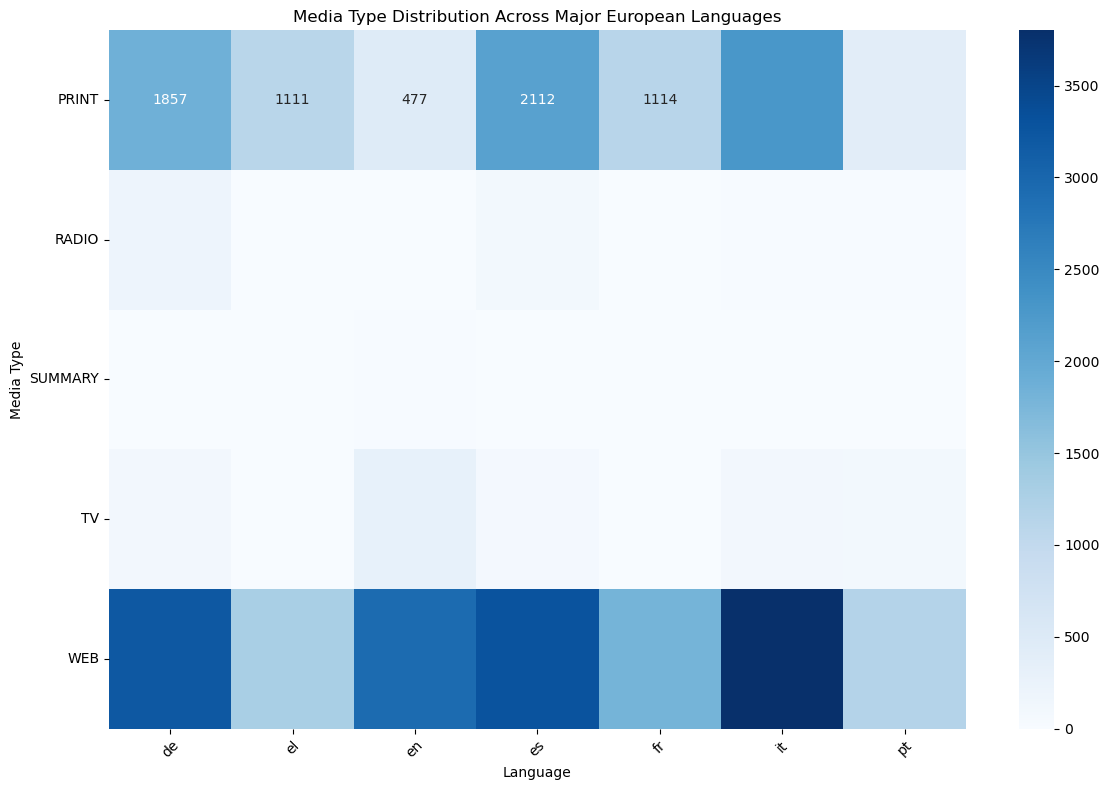

In [37]:
# Filter the DataFrame to include only major European languages
major_languages = ['de', 'el', 'en', 'es', 'fr', 'it', 'pt']
df_major_languages = df[df['Language'].isin(major_languages)]

# Create a crosstab to see the frequency of media types across different languages
media_language_relationship = pd.crosstab(df_major_languages['Media.type'], df_major_languages['Language'])

# Plotting a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(media_language_relationship, annot=True, cmap='Blues', fmt='d')
plt.title('Media Type Distribution Across Major European Languages')
plt.xlabel('Language')
plt.ylabel('Media Type')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal for better readability
plt.tight_layout()       # Adjust subplots to fit into figure area nicely

# Show the plot
plt.show()

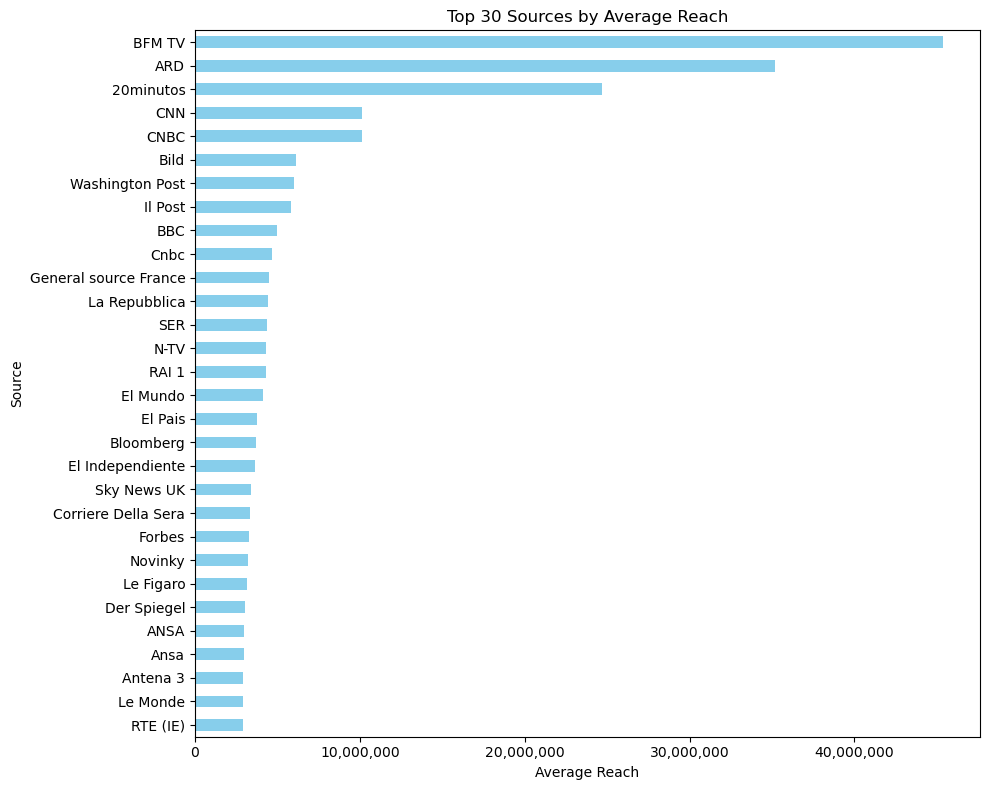

In [38]:
# Process 'Source' to extract the text before the "-"
df['Source'] = df['Source'].str.split(' -').str[0]

# Calculate the average 'Reach' for each 'Source'
source_reach = df.groupby('Source')['Reach'].mean()

# Sort the values and select the top N sources for better readability
N = 30  # You can choose a different N if you like
top_sources = source_reach.sort_values(ascending=False).head(N)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
top_sources.plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Top {} Sources by Average Reach'.format(N))
plt.xlabel('Average Reach')
plt.ylabel('Source')
plt.gca().invert_yaxis()  # Invert y-axis to display highest value at the top

# Customize x-axis ticks to show real numbers
plt.gca().xaxis.get_major_formatter().set_scientific(False)  # Disable scientific notation
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(int(x))))  # Format as integer with thousands separator

plt.tight_layout()

# Show the plot
plt.show()


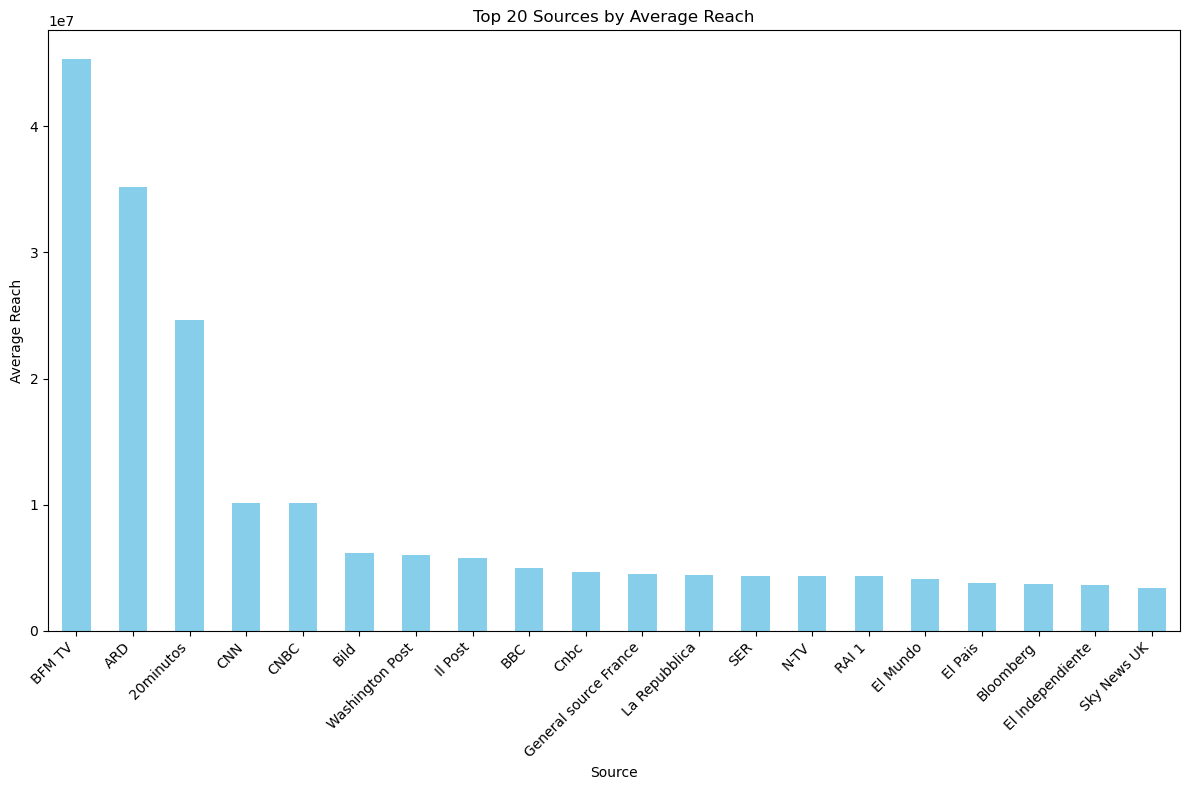

In [39]:
# Splitting the 'Source' column on the hyphen and keeping only the first part
df['Source'] = df['Source'].str.split(' -').str[0]

# Group by 'Source' and calculate the average 'Reach'
source_reach = df.groupby('Source')['Reach'].mean()  # Replace mean() with sum() if total reach is needed

# Sorting the data and getting the top 20 for better visualization
top_20_source_reach = source_reach.sort_values(ascending=False).head(20)

# Plotting the data
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
top_20_source_reach.plot(kind='bar', color='skyblue')  # Create a bar chart with a sky blue color
plt.title('Top 20 Sources by Average Reach')  # Add a title to the plot
plt.xlabel('Source')  # Label for the X-axis
plt.ylabel('Average Reach')  # Label for the Y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust subplots to fit into figure area nicely

# Show the plot
plt.show()

In [40]:
# Count the occurrences of each media type
media_type_counts = df['Media.type'].value_counts()

# Create a DataFrame from the media type counts
media_type_df = media_type_counts.reset_index()
media_type_df.columns = ['Media.type', 'Count']  # Rename columns for clarity

# Show the top 10 most frequent media types
print(media_type_df.head(10))

  Media.type  Count
0        WEB  19845
1      PRINT  10303
2         TV    782
3      RADIO    413
4    SUMMARY     41


In [41]:
# Count the occurrences of each speaker
speaker_counts = df['Speaker'].value_counts()

# Create a DataFrame from the speaker counts
speaker_df = speaker_counts.reset_index()
speaker_df.columns = ['Speaker', 'Count']  # Rename columns for clarity

# Show the top 10 most mentioned speakers
print(speaker_df.head(10))

                          Speaker  Count
0                      Newspapers  15656
1                    Net Magazine   8598
2                       Magazines   2816
3                    Broadcasting   2209
4                        Newswire    466
5     Newspapers, City newspapers    427
6                   Organisations    322
7  Newspapers, Professional press    270
8                      Commercial    254
9           Newspapers, Magazines     31


In [42]:
# Count of articles per Sitename
site_article_counts = df['Sitename'].value_counts()

site_article_counts.head(10)


Sitename
Bloomberg                         1120
Handelsblatt                       923
Milano Finanza                     895
Reuters                            823
Börsen-Zeitung                     728
Expansión                          727
La Stampa                          497
Frankfurter Allgemeine Zeitung     490
La Repubblica                      467
IL SOLE 24 ORE                     412
Name: count, dtype: int64

In [43]:
# Calculate the Readership Ratio
df['Readership_Ratio'] = df['Article_Readership'] / df['Site_Readership']

# Remove rows where 'Sitename' is 'unknown' or 'Readership_Ratio' is infinite
filtered_df = df[(df['Sitename'] != 'unknown') & (df['Readership_Ratio'].notna()) & (df['Readership_Ratio'] != float('inf'))]

# Sort the DataFrame by 'Readership_Ratio' in descending order and display the top 5
top_readership_ratios = filtered_df.sort_values(by='Readership_Ratio', ascending=False).head(5)

# Display the results
print("Top 5 Readership Ratios (after filtering):\n", top_readership_ratios[['Sitename', 'Readership_Ratio']])


Top 5 Readership Ratios (after filtering):
                         Sitename  Readership_Ratio
Date                                              
2023-12-12 03:38:26  Finanzen.ch        101.510119
2023-04-14 09:25:32  Finanzen.ch         86.229397
2023-10-31 17:17:18  Finanzen.ch         82.629831
2023-07-13 12:01:59  Finanzen.ch         78.740823
2023-06-28 16:15:04  Finanzen.ch         73.463399


# PreProcess Scraped Text

In [44]:
# Relative path to the Excel file from the current notebook's location
file_path = '../combined_updated.xlsx'

# Read the Excel file
df_scraped = pd.read_excel(file_path)

# Display the first 20 rows
df_scraped.head(20)


Date                             Source  \
0  2022-09-30 22:08:34     Il Messaggero - Borsa Italiana   
1  2022-09-30 21:44:15  Puls Biznesu - Z ostatniej chwili   
2  2022-09-30 21:30:13            Handelsblatt - Finanzen   
3  2022-09-30 21:07:32                     Trend - Správy   
4  2022-09-30 20:56:08                  Bloomberg - GNews   
5  2022-09-30 19:47:02                      Trend. - Home   
6  2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
7  2022-09-30 19:11:05                            Tgcom24   
8  2022-09-30 19:11:05                            Tgcom24   
9  2022-09-30 18:53:08                       Der Aktionär   
10 2022-09-30 18:46:15                            Tgcom24   
11 2022-09-30 18:42:47                 Il Foglio - Page 3   
12 2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
13 2022-09-30 18:32:37                  Finance.si - Live   
14 2022-09-30 18:25:42                 Il Foglio - Page 3   
15 2022-09-30 18:25:13            Handelsblatt - Finanzen   
16 2022-09-30 18:23:18                            Tgcom24   
17 2022-09-30 18:23:02  Affaritaliani Libero - Notiziario   
18 2022-09-30 18:19:40                 Il Foglio - Page 2   
19 2022-09-30 18:12:29                            Tgcom24   

                                             Headline  \
0   Visco: «Troppi rialzi dei tassi, si va in rece...   
1      Knot: kolejne podwyżki stóp  EBC  są konieczne   
2   EZB-Ratsmitglied Visco: Rezessionsrisiko bei g...   
3   ECB  by mala byť pri zvyšovaní sadzieb opatrná...   
4   ECB 's Schnabel Says Weaker Demand May Not Eas...   
5      EZB-Direktorin Schnabel für "robustes" Handeln   
6   Visco: "Lo shock energetico è un onere ineludi...   
7   Bce: Schnabel, necessari ulteriori rialzi dei ...   
8   Bce: Schnabel non vede rischio spirale salari-...   
9   EZB ‑Geldpolitik: Ratsmitglied Visco warnt vor...   
10    Energia: Visco, shock ineludibile per area euro   
11  **Conti pubblici: Visco, rientro debito ben in...   
12  **Conti pubblici: Visco, rientro debito ben in...   
13  Evrska inflacija na novem rekordu. Bo  ECB  ok...   
14  Bce: Visco, 'su rialzo tassi opportuno muovers...   
15  EZB-Direktorin Schnabel fordert wegen Rekordin...   
16  Inflazione: Visco, no segnali avvio pericolose...   
17  Bce: Visco, 'su rialzo tassi opportuno muovers...   
18  **Bce: Visco, 'rialzo tassi troppo rapido e fo...   
19  Bce: Visco, non ha ritardato riequilibrio poli...   

                                  Translated.headline  \
0   Banca d'Italia's Visco: "Too many rate hikes w...   
1        Knot: further  ECB  rate hikes are necessary   
2   ECB 's Visco: Recession risk in the event of m...   
3   ECB  should be cautious about rate hikes, says...   
4   ECB 's Schnabel says weaker demand may not eas...   
5   ECB  Executive Board Member Schnabel is for "r...   
6   Visco: "Energy shock is an unavoidable burden....   
7        ECB : Schnabel, further rate hikes necessary   
8   ECB : Schnabel sees no risk of spiraling wages...   
9   ECB  monetary policy: Council member Visco war...   
10     Energy: Visco, inescapable shock for euro area   
11  Public accounts: Visco, debt repayment well ad...   
12  Public accounts: Visco, debt repayment well ad...   
13  Euro area inflation on a new record. Will the ...   
14  ECB , Visco: “it is appropriate to move gradua...   
15  ECB  Executive Board Member Schnabel calls for...   
16  Inflation: Visco, no signs start dangerous pri...   
17  ECB : Visco, when rising rates it is appropria...   
18  ECB , Visco: too rapid and strong rate hike ca...   
19  ECB : Visco, did not delay monetary policy reb...   

                                       Manual.summary  \
0   At a conference in Florence, Banca d'Italia Go...   
1                                                 NaN   
2   Banca d'Italia Governor  Ignazio Visco  on Fri...   
3                                                 NaN   
4   ECB  Executive Board Member  Isabel Schnabel  ...  

In [45]:
df_scraped.shape

(35076, 16)

In [46]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty
null_rows = df[(df['Manual.summary'].isnull() | df['Manual.summary'].eq('')) & 
               (df['Translated.text'].isnull() | df['Translated.text'].eq(''))]

# Print the selected rows
print(null_rows)


Empty DataFrame
Columns: [Source, Headline, Translated.headline, Manual.summary, Original.article.url, Translated.text, Media.type, Speaker, Reach, Language, Country.Code, Sitename, Tags, Site_Readership, Article_Readership, Readership_Ratio]
Index: []


In [47]:
# Select rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
null_rows = df_scraped[(df_scraped['Manual.summary'].isnull() | df_scraped['Manual.summary'].eq('') | df_scraped['Manual.summary'].eq('-')) & 
                       (df_scraped['Translated.text'].isnull() | df_scraped['Translated.text'].eq(''))]

# Count the number of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
count_both_missing = null_rows.shape[0]

# Calculate the total number of rows in the DataFrame
total_rows = df_scraped.shape[0]

# Calculate the percentage of rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
percentage_both_missing = (count_both_missing / total_rows) * 100

# Print the number of rows and the percentage of total rows where both 'Manual.summary' and 'Translated.text' are null or empty or contain '-'
print(f"Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {count_both_missing}")
print(f"Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': {percentage_both_missing:.2f}%")

# Print the selected rows
print("\nRows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':")
print(null_rows)


Number of rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 1034
Percentage of total rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-': 2.95%

Rows where both 'Manual.summary' and 'Translated.text' are null, empty, or contain '-':
                     Date                             Source  \
5     2022-09-30 19:47:02                      Trend. - Home   
6     2022-09-30 19:17:43  Rai News 24  - Economia e finanza   
12    2022-09-30 18:39:39  Affaritaliani Libero - Notiziario   
35    2022-09-30 13:10:39                Investor.Bg - Видео   
40    2022-09-30 09:22:50         Børsen - Pro International   
...                   ...                                ...   
29728 2023-12-06 10:55:34                  Bloomberg - News1   
29739 2023-12-06 08:20:16                   Bloomberg - Asia   
32754 2023-10-26 14:58:48                          HN Online   
32972 2023-10-25 10:40:21                   Bloomberg 

### Preprocess Manual Summary and Scraped Text

In [48]:
# Download necessary NLTK resources if not already available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Prepare the stopwords set once to avoid repeated loading
initial_stop_words = stopwords.words('english')
custom_stopwords = {
    'npagina', 'nfoglio', 'nquotidiano', 'ndi', 'nla', 'ndie', 'nder', 'ne', 'nlos', 'nde', 
    'na', 'nto', 'np', 'nel', 'nque', 'nen', 'ndel', 'cm'
}
stop_words = set(initial_stop_words).union(custom_stopwords)

def clean_text(text):
    """
    Perform initial cleaning of the text by removing URLs, numbers,
    non-alphabetic characters, and converting to lowercase.
    """
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\b\d+\b', '', text)  # Remove all standalone numbers
    text = re.sub(r'\bn[a-z]{2,}\b', '', text)  # Aggressively remove words starting with 'n' followed by at least two letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower()

def tokenize(text, mode):
    """
    Tokenizes the text based on the given mode.
    Mode 0: Convert text to lowercase.
    Mode 1: Apply stemming.
    Mode 2: Apply lemmatization.
    """
    text = clean_text(text)  # Apply enhanced cleaning
    words = word_tokenize(text)
    if mode == 1:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words if word not in stop_words]
    elif mode == 2:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    else:
        words = [word for word in words if word not in stop_words]

    return ' '.join(words)

def preprocess_texts(data_frame, column_name, mode):
    """
    Apply text preprocessing to a specified column in a DataFrame.
    """
    # Fill NaN values with empty strings before processing
    data_frame[column_name] = data_frame[column_name].fillna('')
    # Use tqdm to display progress while applying preprocessing
    tqdm.pandas(desc="Processing Texts")
    return data_frame[column_name].astype(str).progress_apply(lambda row: tokenize(row, mode))

In [49]:
import numpy as np
mod = 2  # Set the preprocessing mode to 2 for lemmatizing

# Reset the index of the DataFrame to avoid duplicate labels
df_scraped.reset_index(drop=True, inplace=True)

# Determine which column to preprocess for translated text
df_scraped['text_to_preprocess'] = np.where(df_scraped['Translated.text'].fillna('').str.strip() == '',
                                            df_scraped['Manual.summary'], 
                                            df_scraped['Translated.text'])

# Apply preprocessing to the determined text
df_scraped['translated_text_preproc'] = preprocess_texts(df_scraped, 'text_to_preprocess', mod)

# Apply preprocessing to the Manual.summary column
df_scraped['manual_summary_preproc'] = preprocess_texts(df_scraped, 'Manual.summary', mod)

# Remove the auxiliary column if no longer needed
df_scraped.drop(columns=['text_to_preprocess'], inplace=True)

# Display the result to verify
display(df_scraped[['Source', 'Manual.summary', 'Translated.text', 'Language', 'translated_text_preproc', 'manual_summary_preproc']].head(20))

Processing Texts: 100%|██████████| 35076/35076 [01:26<00:00, 404.23it/s] 


Source  \
0      Il Messaggero - Borsa Italiana   
1   Puls Biznesu - Z ostatniej chwili   
2             Handelsblatt - Finanzen   
3                      Trend - Správy   
4                   Bloomberg - GNews   
5                       Trend. - Home   
6   Rai News 24  - Economia e finanza   
7                             Tgcom24   
8                             Tgcom24   
9                        Der Aktionär   
10                            Tgcom24   
11                 Il Foglio - Page 3   
12  Affaritaliani Libero - Notiziario   
13                  Finance.si - Live   
14                 Il Foglio - Page 3   
15            Handelsblatt - Finanzen   
16                            Tgcom24   
17  Affaritaliani Libero - Notiziario   
18                 Il Foglio - Page 2   
19                            Tgcom24   

                                       Manual.summary  \
0   At a conference in Florence, Banca d'Italia Go...   
1                                                       
2   Banca d'Italia Governor  Ignazio Visco  on Fri...   
3                                                       
4   ECB  Executive Board Member  Isabel Schnabel  ...   
5                                                       
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11  In a speech organised by the Florence School o...   
12                                                      
13  According to first estimates, euro area inflat...   
14  It is appropriate for the  ECB  to move gradua...   
15  On Friday,  ECB  Executive Board Member  Isabe...   
16                                                      
17                                                      
18  The monetary policy normalisation will have to...   
19                                                      

                                      Translated.text Language  \
0   No to an excessive rise in rates. The Governor...       it   
1   Klaas knot photo by Zach Gibson/Bloomberg The ...       pl   
2                                                 NaN       de   
3   The governor of the Italian central bank, Igna...       sk   
4   European Central Bank Executive Board member I...       en   
5                                                 NaN       de   
6                                                 NaN       it   
7   MILAN (MF-DJ)--"Further increases in our rates...       it   
8   MILAN (MF-DJ)--"If long-term inflation expecta...       it   
9   The fear of an approaching recession and furth...       de   
10  ROME (MF-DJ)--"As with the "sheik's tax" of th...       it   
11                                                NaN       it   
12                                                NaN       it   
13                                                NaN       sl   
14  Rome, 30 September - (Adnkronos) - On the next...       it   
15                                                NaN       de   
16  ROME (MF-DJ)--There is currently no "evidence ...       it   
17  Rome, 30 September - (Adnkronos) - On the next...       it   
18  Rome, 30 September - (Adnkronos) - "The Normal...       it   
19  ROME (MF-DJ)--"In light of the information ava...       it   

                              translated_text_preproc  \
0   excessive rise rate governor bank italy vincen...   
1   klaas knot photo zach gibsonbloomberg head dut...   
2   banca ditalia governor ignazio visco friday wa...   
3   governor italian central bank ignazio visco wa...   
4   european central bank executive board member i...   
5                                                       
6                                                       
7   milan mfdjfurther increase rate n reference en...   
8   milan mfdjif longterm inflation expectationsn ...   
9   fear appro

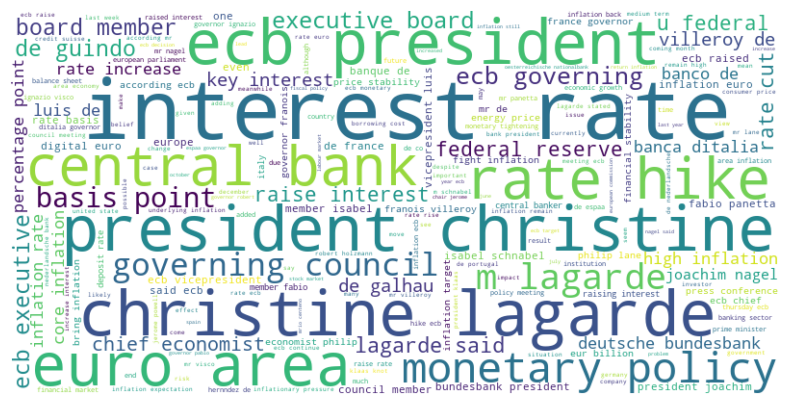

In [50]:
# Combine all the text from 'manual_summary_preproc' into a single string
text = ' '.join(df_scraped['manual_summary_preproc'].dropna().astype(str).tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Older Code-LDA (keeping for now)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus

In [ ]:
def vectorize_text(data, column_name, max_features=1000):
    vectorizer = CountVectorizer(max_df=0.5, min_df=0.01, stop_words='english', max_features=max_features)
    dtm = vectorizer.fit_transform(data[column_name])
    return dtm, vectorizer

In [ ]:
def dtm_to_gensim(dtm):
    return Sparse2Corpus(dtm, documents_columns=False)

In [ ]:
def run_lda(corpus, id2word, num_topics=10, passes=10):
    lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=passes, random_state=100)
    return lda_model

In [ ]:
def display_topics(lda_model):
    print("Top words associated with each topic (LDA):")
    topics = lda_model.show_topics(num_words=10, formatted=False)
    for topic_num, topic_words in topics:
        words = ', '.join([word for word, _ in topic_words])
        print(f"Topic {topic_num + 1}: {words}")

In [ ]:
"""
# Define the function to convert DTM to Gensim corpus
#def dtm_to_gensim(dtm):
#    return Sparse2Corpus(dtm, documents_columns=False)

# Vectorize the preprocessed text data
dtm, vectorizer = vectorize_text(df_scraped, 'translated_text_preproc', max_features=1000)

# Convert to Gensim corpus and prepare dictionary
corpus = dtm_to_gensim(dtm)
id2word = {i: word for i, word in enumerate(vectorizer.get_feature_names_out())}

# Run LDA
lda_model = run_lda(corpus, id2word, num_topics=10, passes=10)

# Display the topics
display_topics(lda_model)
"""


"\n# Define the function to convert DTM to Gensim corpus\n#def dtm_to_gensim(dtm):\n#    return Sparse2Corpus(dtm, documents_columns=False)\n\n# Vectorize the preprocessed text data\ndtm, vectorizer = vectorize_text(df_scraped, 'translated_text_preproc', max_features=1000)\n\n# Convert to Gensim corpus and prepare dictionary\ncorpus = dtm_to_gensim(dtm)\nid2word = {i: word for i, word in enumerate(vectorizer.get_feature_names_out())}\n\n# Run LDA\nlda_model = run_lda(corpus, id2word, num_topics=10, passes=10)\n\n# Display the topics\ndisplay_topics(lda_model)\n"

## Analysis of Each Topic:

### Topic 1: Market Trends and Economic Indicators
- **Focus:** This topic covers market trends and economic indicators, including discussions on stock market performance, index movements, and economic data such as inflation rates and GDP growth. It may also include analyses of monetary policy decisions and their impact on financial markets.

### Topic 2: Italian Economic Policy and Governance
- **Focus:** This topic revolves around Italian economic policy and governance, featuring discussions on government decisions, fiscal policies, and economic reforms. It may also include analyses of key figures in Italian politics and economics, such as government ministers and central bank officials.

### Topic 3: Financial Market Analysis
- **Focus:** This topic delves into financial market analysis, including discussions on investment strategies, market sentiment, and investor behavior. It may cover topics such as market volatility, asset allocation, and economic forecasts.

### Topic 4: European Economic Landscape
- **Focus:** This topic explores the broader European economic landscape, encompassing discussions on economic trends, trade relations, and regional economic integration. It may also include analyses of European Union policies and initiatives aimed at promoting economic growth and stability.

### Topic 5: Housing Market and Real Estate
- **Focus:** This topic focuses on the housing market and real estate sector, including discussions on property prices, mortgage rates, and housing affordability. It may cover topics such as housing market trends, residential construction activity, and government housing policies.

### Topic 6: Digital Finance and Innovation
- **Focus:** This topic addresses digital finance and innovation, featuring discussions on financial technology (fintech), digital payment systems, and emerging trends in digital banking. It may also include analyses of regulatory developments and the impact of technology on the financial sector.

### Topic 7: Economic Policy and Regulation
- **Focus:** This topic covers economic policy and regulation, including discussions on regulatory frameworks, government interventions, and policy measures aimed at promoting economic stability and growth. It may also include analyses of regulatory compliance and its implications for businesses and financial institutions.

### Topic 8: Global Economic Trends
- **Focus:** This topic examines global economic trends, encompassing discussions on international trade, global economic outlook, and geopolitical developments affecting the global economy. It may cover topics such as trade tensions, currency exchange rates, and economic forecasts for major economies.

### Topic 9: Monetary Policy and Central Banking
- **Focus:** This topic revolves around monetary policy and central banking, featuring discussions on interest rate decisions, monetary stimulus measures, and central bank communications. It may also include analyses of central bank strategies and their implications for monetary stability and inflation management.

### Topic 10: Energy Markets and Sustainability
- **Focus:** This topic explores energy markets and sustainability issues, including discussions on energy prices, renewable energy investments, and environmental policies. It may cover topics such as energy transition strategies, climate change mitigation efforts, and the role of energy in sustainable development.


### Older Code (more lda)

In [ ]:
"""
from gensim import corpora

# Create a new Gensim dictionary
gensim_dictionary = corpora.Dictionary()

# Assuming 'id2word' is your Python dictionary that maps IDs to tokens
gensim_dictionary.id2token = id2word
gensim_dictionary.token2id = {v: k for k, v in id2word.items()}
"""

"\nfrom gensim import corpora\n\n# Create a new Gensim dictionary\ngensim_dictionary = corpora.Dictionary()\n\n# Assuming 'id2word' is your Python dictionary that maps IDs to tokens\ngensim_dictionary.id2token = id2word\ngensim_dictionary.token2id = {v: k for k, v in id2word.items()}\n"

In [ ]:
"""
# Print some dictionary items to confirm
for i, word in list(gensim_dictionary.items())[:10]:
    print(i, word)
"""

'\n# Print some dictionary items to confirm\nfor i, word in list(gensim_dictionary.items())[:10]:\n    print(i, word)\n'

In [ ]:
"""import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assuming 'lda_model' and 'corpus' are already defined
lda_display = gensimvis.prepare(lda_model, corpus, dictionary=gensim_dictionary, sort_topics=False)

# Display in a Jupyter Notebook
pyLDAvis.display(lda_display) """

"import pyLDAvis\nimport pyLDAvis.gensim_models as gensimvis\n\n# Assuming 'lda_model' and 'corpus' are already defined\nlda_display = gensimvis.prepare(lda_model, corpus, dictionary=gensim_dictionary, sort_topics=False)\n\n# Display in a Jupyter Notebook\npyLDAvis.display(lda_display) "

### Older Code Pre-Processing (2nd Attempt)

In [ ]:
def tokenize(text, mode):
    """
    Tokenizes the text based on the given mode.
    mode 0: Convert text to lowercase.
    mode 1: Apply stemming.
    mode 2: Apply lemmatization.
    """
    # Basic cleaning
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]

    if mode == 1:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    elif mode == 2:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [ ]:
def preprocess_texts(data_frame, column_name, mode):
    # Fill NaN values with empty strings before processing
    data_frame[column_name] = data_frame[column_name].fillna('')
    return data_frame[column_name].astype(str).progress_apply(lambda row: tokenize(row, mode))

In [ ]:
# Assuming your dataframe 'df' is already loaded and includes the necessary columns
mod = 2  # Set the preprocessing mode to 2 for lemmatizing

# Apply preprocessing to the relevant columns
df['Translated_headline_preproc'] = preprocess_texts(df, 'Translated.headline', mod)
df['Manual_summary_preproc'] = preprocess_texts(df, 'Manual.summary', mod)

# Display the result to verify
df[['Translated.headline', 'Translated_headline_preproc', 'Manual.summary', 'Manual_summary_preproc']].head(20)

Processing Texts:  19%|█▉        | 6623/35076 [01:40<07:12, 65.81it/s] 


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus


In [ ]:
def vectorize_text(data, column_name, max_features=1000):
    vectorizer = CountVectorizer(max_df=0.5, min_df=0.01, stop_words='english', max_features=max_features)
    dtm = vectorizer.fit_transform(data[column_name])
    return dtm, vectorizer


In [ ]:
def dtm_to_gensim(dtm):
    # Convert sparse matrix to gensim corpus
    corpus = Sparse2Corpus(dtm, documents_columns=False)
    return corpus


In [ ]:
def run_lda(corpus, id2word, num_topics=10, passes=10):
    lda_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=passes, random_state=100)
    return lda_model


In [ ]:
def display_topics(lda_model):
    print("Top words associated with each topic (LDA):")
    topics = lda_model.show_topics(num_words=10, formatted=False)
    for topic_num, topic_words in topics:
        words = ', '.join([word for word, _ in topic_words])
        print(f"Topic {topic_num + 1}: {words}")


In [ ]:
"""
def display_enhanced_topics(lda_model, feature_names, no_top_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=no_top_words, formatted=False)
    for topic_idx, topic in enumerate(topics):
        # Extracting words from each topic
        topic_words = [word for word, prob in topic[1]]
        print(f"Topic {topic_idx + 1}: {', '.join(topic_words)}")
        print("Potential Interpretation: Discusses aspects related to ... based on terms such as ...")
        print("\n")
"""


'\ndef display_enhanced_topics(lda_model, feature_names, no_top_words=10):\n    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=no_top_words, formatted=False)\n    for topic_idx, topic in enumerate(topics):\n        # Extracting words from each topic\n        topic_words = [word for word, prob in topic[1]]\n        print(f"Topic {topic_idx + 1}: {\', \'.join(topic_words)}")\n        print("Potential Interpretation: Discusses aspects related to ... based on terms such as ...")\n        print("\n")\n'

In [ ]:
def display_document_topics(lda_model, corpus, texts, num_topics=10):
    for i, (topics, text) in enumerate(zip(lda_model[corpus], texts)):
        print(f"Document {i}:")
        print(f"Text: {text[:100]}...")  # Showing a snippet of the text
        sorted_topics = sorted(topics, key=lambda x: x[1], reverse=True)
        for topic_num, prop_topic in sorted_topics:
            if prop_topic > 0.1:  # Only significant contributions
                print(f"Topic {topic_num + 1}: {prop_topic*100:.1f}%")
        print("\n")

In [ ]:
# Vectorize the preprocessed text data
dtm, vectorizer = vectorize_text(df, 'Manual_summary_preproc', max_features=1000)

# Convert to Gensim corpus and prepare dictionary
corpus = dtm_to_gensim(dtm)
id2word = {i: word for i, word in enumerate(vectorizer.get_feature_names_out())}

# Run LDA
lda_model = run_lda(corpus, id2word, num_topics=10, passes=10)

# Display the topics
display_topics(lda_model)
display_enhanced_topics(lda_model, vectorizer.get_feature_names_out(), 10)
display_document_topics(lda_model, corpus, df['Manual_summary_preproc'].fillna("").tolist(), 10)


Top words associated with each topic (LDA):
Topic 1: bank, bond, eur, billion, debt, year, balance, yield, deposit, pepp
Topic 2: euro, area, year, price, month, growth, expected, according, forecast, data
Topic 3: governor, mr, nagel, said, villeroy, galhau, bundesbank, france, deutsche, banque
Topic 4: lagarde, bank, european, financial, christine, banking, stability, market, euro, said
Topic 5: lagarde, hike, meeting, christine, point, council, governing, decision, cut, basis
Topic 6: guindos, economic, price, wage, economy, increase, growth, policy, risk, mr
Topic 7: lagarde, bank, central, reserve, market, christine, federal, cut, policy, monetary
Topic 8: board, euro, digital, executive, member, schnabel, panetta, isabel, fabio, currency
Topic 9: mr, governor, minister, banco, banca, ditalia, government, italy, italian, visco
Topic 10: said, level, target, mr, bank, policy, long, monetary, lane, central


NameError: name 'display_enhanced_topics' is not defined

### Analyzing the LDA Output:

- **Topic 1:** Focuses on financial terms and instruments like bonds, debts, and yields, possibly relating to ECB's financial operations or market interventions.
- **Topic 2:** Appears to be about macroeconomic indicators within the euro area, like growth forecasts and price data.
- **Topic 3:** Could be centered around comments or actions from specific central bank governors or monetary officials.
- **Topic 4 and Topic 5:** Involve Christine Lagarde, highlighting her influence and specific decisions or statements during meetings.
- **Topic 6:** Discusses broader economic issues, including wages and economic policy implications.
- **Topic 7:** Relates to broader central banking functions, potentially comparing ECB with other central banks like the Federal Reserve.
- **Topic 8:** Discusses the European Central Bank's executive board and digital currency initiatives.
- **Topic 9:** Seems focused on Italian financial matters, particularly involving Banca d'Italia and its governor.
- **Topic 10:** Discusses general monetary policy targets and decisions.


### Older Code (more lda)

In [ ]:
from gensim import corpora

# Create a new Gensim dictionary
gensim_dictionary = corpora.Dictionary()

# Assuming 'id2word' is your Python dictionary that maps IDs to tokens
gensim_dictionary.id2token = id2word
gensim_dictionary.token2id = {v: k for k, v in id2word.items()}


In [ ]:
# Print some dictionary items to confirm
for i, word in list(gensim_dictionary.items())[:10]:
    print(i, word)


0 ability
1 able
2 according
3 account
4 achieve
5 acknowledged
6 act
7 action
8 activity
9 add


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assuming 'lda_model' and 'corpus' are already defined
lda_display = gensimvis.prepare(lda_model, corpus, dictionary=gensim_dictionary, sort_topics=False)

# Display in a Jupyter Notebook
pyLDAvis.display(lda_display)
